# **ARIMA**

In [ ]:
import pandas as pd

path = '/content/ADVANC.BK (2).csv'
data = pd.read_csv(path, index_col='Date')

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-28,196.0,199.5,196.0,198.0,161.699829,7233100
2018-03-02,197.5,199.5,196.0,197.0,160.883163,5794800
2018-03-05,197.0,198.0,194.0,196.5,160.474823,6526700
2018-03-06,200.0,200.0,200.0,200.0,163.333160,812200
2018-03-07,200.0,201.0,197.5,197.5,161.291519,7438000
...,...,...,...,...,...,...
2023-02-21,210.0,211.0,208.0,210.0,205.759995,6670500
2023-02-22,206.0,208.0,206.0,208.0,208.000000,5605500
2023-02-23,207.0,208.0,205.0,206.0,206.000000,4638800


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.364734
p-value: 0.151938
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [ ]:
data = data[['Close']]

<Axes: xlabel='Date'>

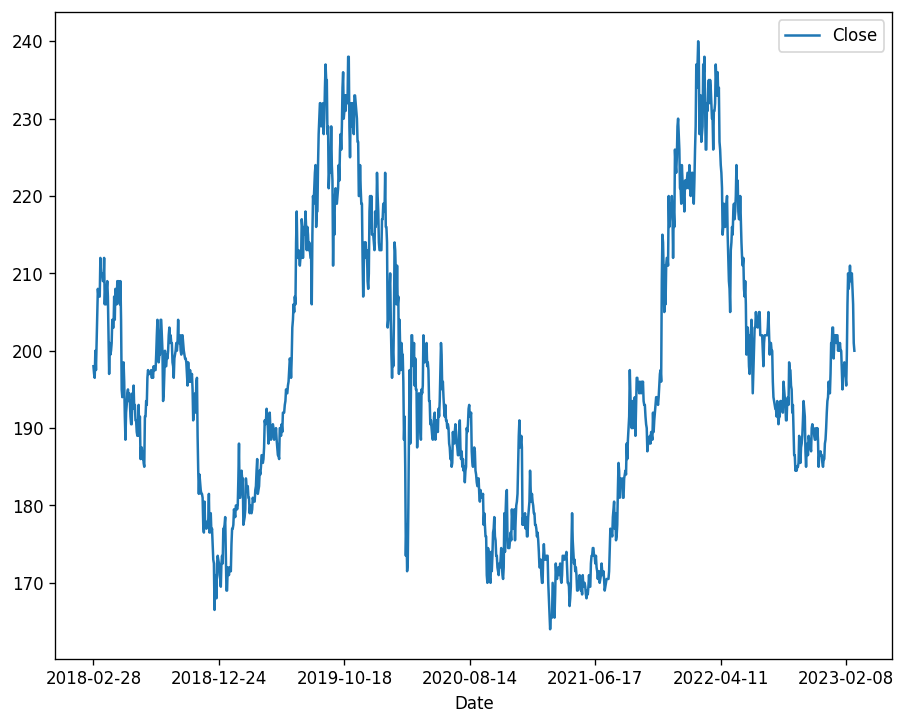

In [ ]:
data.plot()

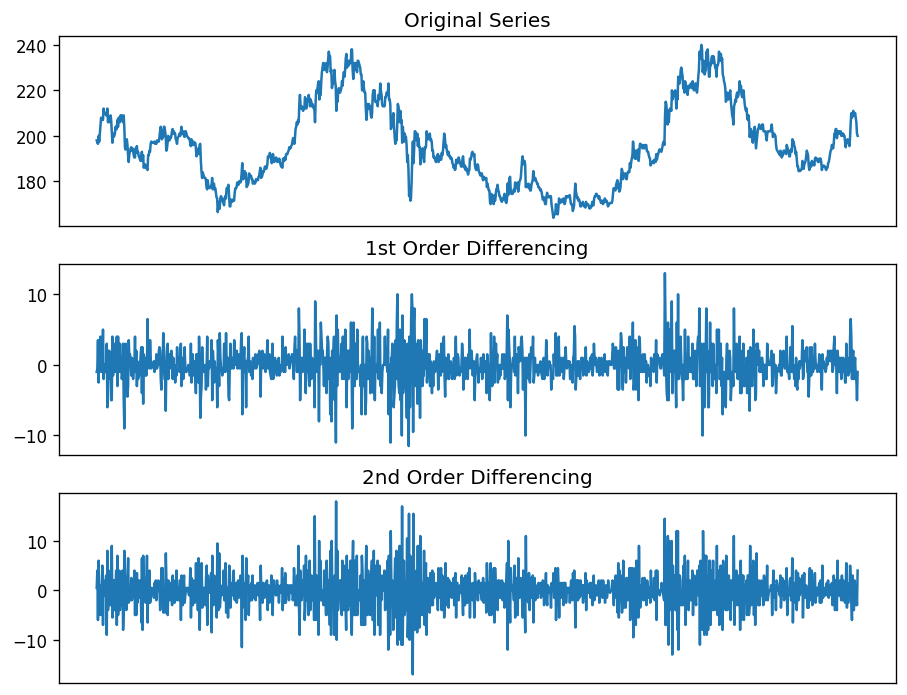

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.Close); ax1.set_title('Original Series');
ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(data.Close.diff()); ax2.set_title('1st Order Differencing');
ax2.axes.xaxis.set_visible(False)

# 2nd Differencing
ax3.plot(data.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.axes.xaxis.set_visible(False)

plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


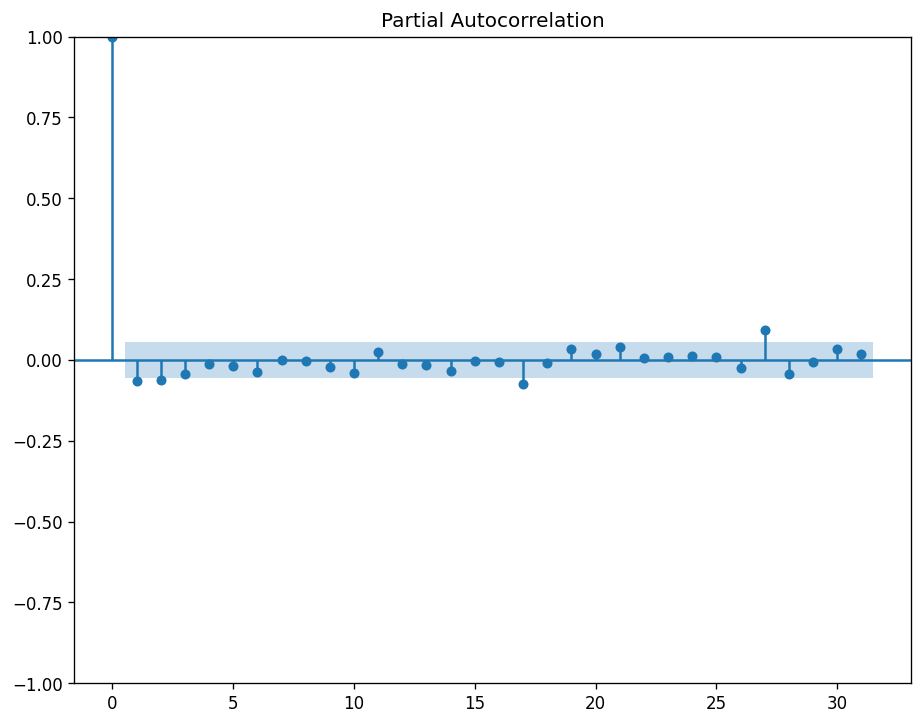

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf

sm.graphics.tsa.plot_pacf(data.Close.diff().dropna())
plt.show()

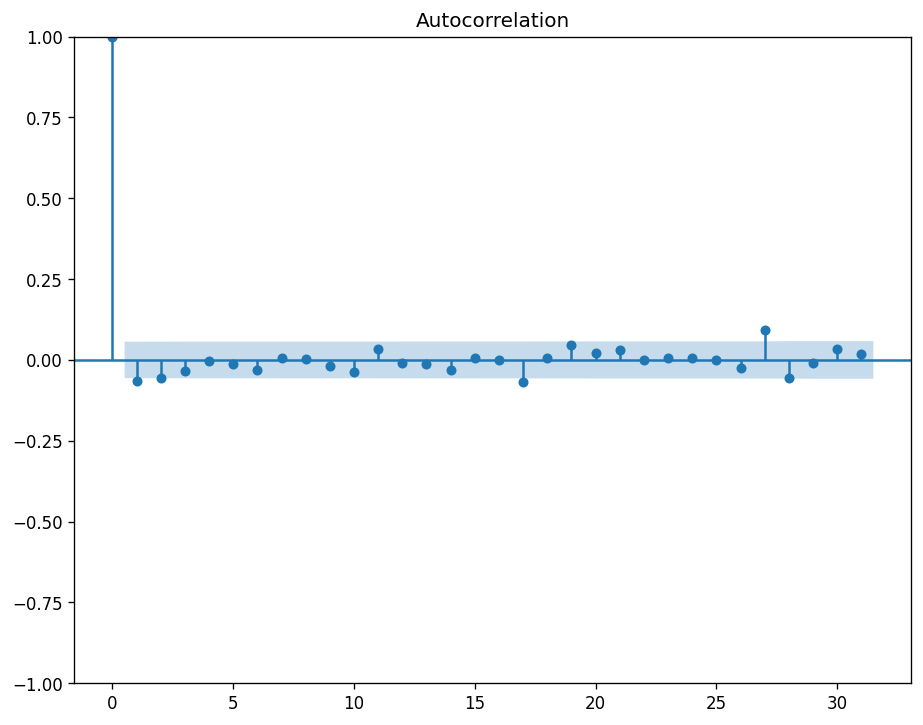

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

sm.graphics.tsa.plot_acf(data.Close.diff().dropna())
plt.show()

In [ ]:
model = sm.tsa.arima.ARIMA(data['Close'], order = (1, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1214
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2923.781
Date:                Thu, 30 Mar 2023   AIC                           5853.562
Time:                        14:52:18   BIC                           5868.865
Sample:                             0   HQIC                          5859.324
                               - 1214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7367      0.075      9.797      0.000       0.589       0.884
ma.L1         -0.8101      0.065    -12.413      0.000      -0.938      -0.682
sigma2         7.2633      0.200     36.284      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


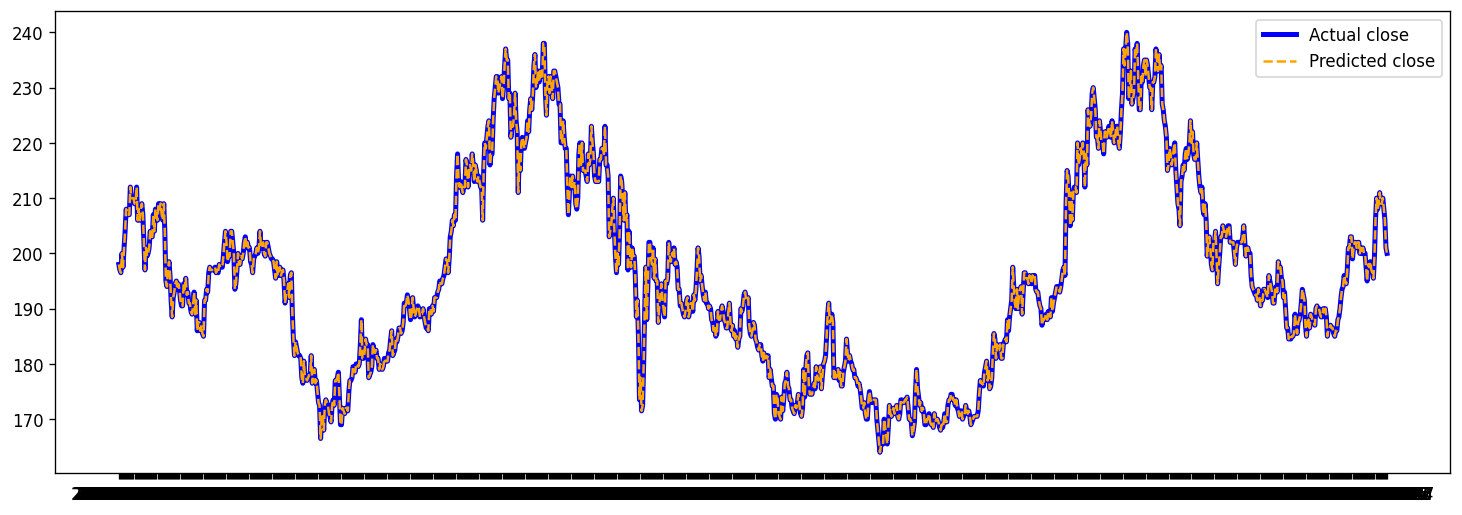

In [ ]:
prediction = pd.DataFrame(results.predict(), columns=['Predicted'])

df_pred = pd.merge(data, prediction, how = 'left', left_index = True, right_index = True)
df_pred['Predicted_close'] = df_pred['Close'] + df_pred['Predicted'].shift(-1)
df_pred['Predicted_close'] = df_pred['Predicted_close'].shift(1).fillna(data['Close'])

fig = plt.subplots(figsize=(15,5))  
plt.plot(df_pred['Close'], color = 'blue', label = 'Actual close', linewidth=3)
plt.plot(df_pred['Predicted_close'], linestyle = 'dashed', color='orange', label = 'Predicted close', linewidth=1.5)
plt.legend()